In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# XMeans_Ensemble.py
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_df = pd.read_csv("../Dataset/712/train.csv")
valid_df = pd.read_csv("../Dataset/712/valid.csv")
test_df = pd.read_csv("../Dataset/712/test.csv")

In [4]:
# Tạo cột doanh thu
for df in [train_df, valid_df, test_df]:
    df['Revenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])

# Tiền xử lý: chọn đặc trưng số (không dùng SalesChannel)
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
scaler = StandardScaler()

X_train = scaler.fit_transform(train_df[features])
X_valid = scaler.transform(valid_df[features])
X_test = scaler.transform(test_df[features])

y_train = train_df['Revenue']
y_valid = valid_df['Revenue']
y_test = test_df['Revenue']

# Clustering (giả lập X-Means bằng cách thử nhiều K và chọn tốt nhất)
best_k = 1
best_inertia = float('inf')
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_k = k

print(f"Best k từ X-Means giả lập: {best_k}")

# Huấn luyện mô hình ensemble
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Best k từ X-Means giả lập: 10
MAE: 11.84, RMSE: 19.02


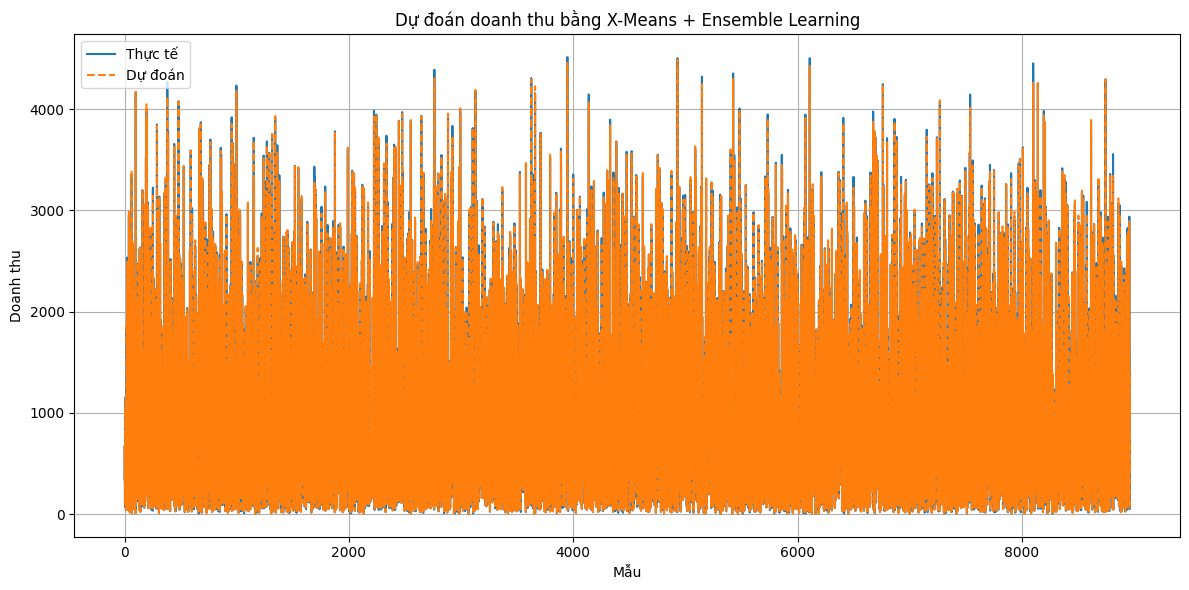

In [5]:
# Trực quan hóa kết quả
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Thực tế')
plt.plot(preds, label='Dự đoán', linestyle='--')
plt.title('Dự đoán doanh thu bằng X-Means + Ensemble Learning')
plt.xlabel('Mẫu')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()